In [6]:
import csv
import numpy as np
import tweepy
import requests
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [7]:
# df = pd.read_csv('aapl.csv')
df = pd.read_csv('ual.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume
0,13-Apr-17,69.90,70.14,69.07,69.07,5185216
1,12-Apr-17,71.65,71.73,69.69,69.93,7622861
2,11-Apr-17,70.15,70.72,68.36,70.71,17696474
3,10-Apr-17,70.55,72.10,70.25,71.52,3460363
4,7-Apr-17,69.97,71.02,69.72,70.88,2471072


In [9]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [10]:
# df['Date']=df['Date'].to_datetime(df["Date"],format='%d%b%Y')
dates = [(pd.to_datetime(date)).toordinal() for date in df['Date']]
prices = pd.Series(df['Open'])
dates = np.reshape(dates,(len(dates),1))

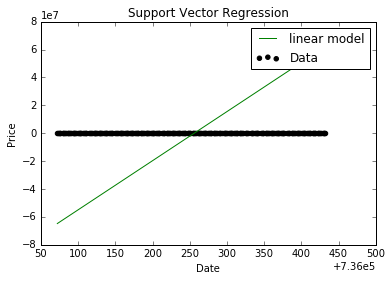

In [11]:
svr_lin = SVR(kernel = 'linear',C=1e3)
svr_lin.fit(dates,prices)
plt.scatter(dates,prices,color='black',label='Data')
plt.plot(dates,svr_lin.predict(dates),color='green',label='linear model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()

In [ ]:
svr_poly = SVR(kernel = 'poly',C=1e3,degree=2)
svr_poly.fit(dates,prices)
plt.scatter(dates,prices,color='black',label='Data')
plt.plot(dates,svr_poly.predict(dates),color='blue',label='Polynomial model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()

In [ ]:
svr_rbf = SVR(kernel = 'rbf',C=1e3,gamma=0.1)
svr_rbf.fit(dates,prices)
plt.plot(dates,svr_rbf.predict(dates),color='red',label='RBF model')
plt.scatter(dates,prices,color='black',label='Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
# plt.legend()

In [ ]:
scores = cross_val_score(svr_rbf, dates, prices, cv=10, scoring='accuracy')